In [13]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np


In [14]:
data_path = '/content/helpdesk_customer_multi_lang_tickets.csv'
df = pd.read_csv(data_path)

In [15]:
# Display basic information
print("Dataset Information:")
df.info()
print("\nFirst 5 Rows:")
print(df.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1566 entries, 0 to 1565
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1566 non-null   int64  
 1   subject        1565 non-null   object 
 2   body           1565 non-null   object 
 3   answer         1566 non-null   object 
 4   type           1566 non-null   object 
 5   queue          1566 non-null   object 
 6   priority       1566 non-null   object 
 7   language       1566 non-null   object 
 8   business_type  1566 non-null   object 
 9   tag_1          1566 non-null   object 
 10  tag_2          1566 non-null   object 
 11  tag_3          1566 non-null   object 
 12  tag_4          1566 non-null   object 
 13  tag_5          1419 non-null   object 
 14  tag_6          1011 non-null   object 
 15  tag_7          489 non-null    object 
 16  tag_8          137 non-null    object 
 17  tag_9          0 non-null      

In [16]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
id                  0
subject             1
body                1
answer              0
type                0
queue               0
priority            0
language            0
business_type       0
tag_1               0
tag_2               0
tag_3               0
tag_4               0
tag_5             147
tag_6             555
tag_7            1077
tag_8            1429
tag_9            1566
dtype: int64


In [17]:
# Drop `tag_9` column (100% missing values)
if 'tag_9' in df.columns:
    df.drop('tag_9', axis=1, inplace=True)

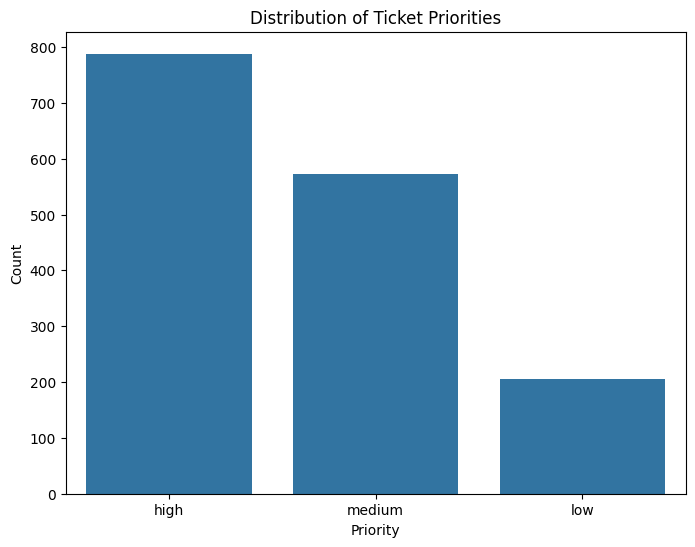

In [18]:
# Univariate Analysis: Distribution of priorities
if 'priority' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x='priority', order=df['priority'].value_counts().index)
    plt.title('Distribution of Ticket Priorities')
    plt.xlabel('Priority')
    plt.ylabel('Count')
    plt.show()

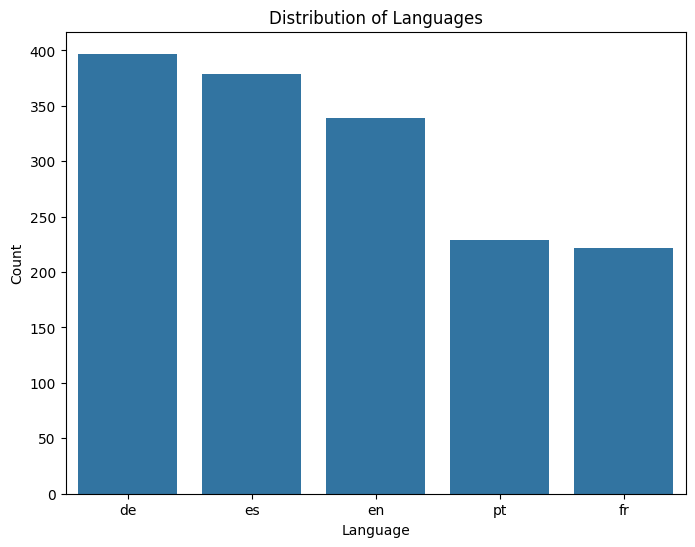

In [19]:
# Univariate Analysis: Distribution of languages
if 'language' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x='language', order=df['language'].value_counts().index)
    plt.title('Distribution of Languages')
    plt.xlabel('Language')
    plt.ylabel('Count')
    plt.show()

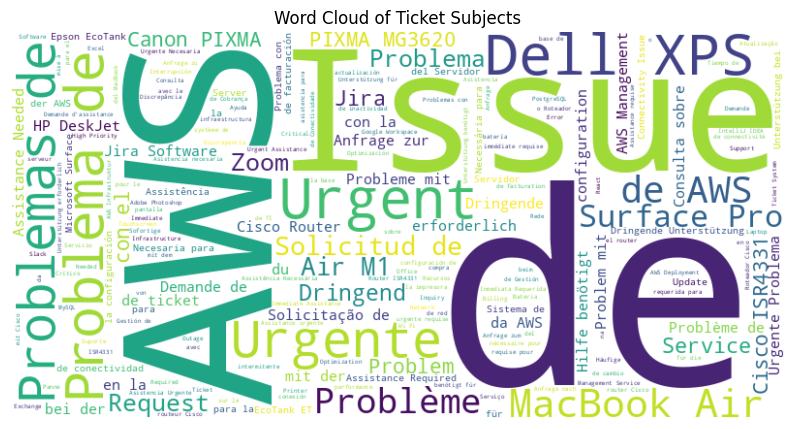

In [20]:
# Generate WordCloud for `subject` column
if 'subject' in df.columns:
    subject_text = ' '.join(df['subject'].dropna().astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(subject_text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Ticket Subjects')
    plt.show()

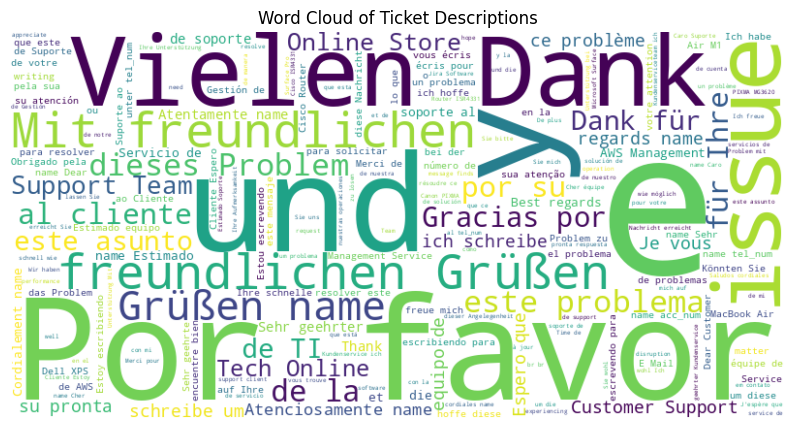

In [21]:
# Generate WordCloud for `body` column
if 'body' in df.columns:
    body_text = ' '.join(df['body'].dropna().astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(body_text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Ticket Descriptions')
    plt.show()

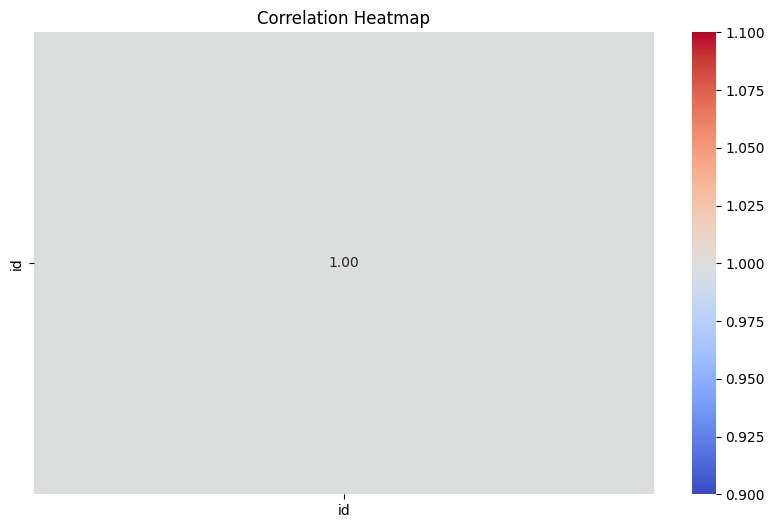

In [22]:
# Check for numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['number'])
if not numeric_columns.empty:
    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()
else:
    print("No numeric columns available for correlation analysis.")

In [23]:
# Save cleaned data
output_path = '/content/cleaned_helpdesk_data.csv'
df.to_csv(output_path, index=False)
print(f"Cleaned data saved to {output_path}")

Cleaned data saved to /content/cleaned_helpdesk_data.csv
